## Exercises

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [16]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import acquire
import prepare
import split

In [3]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,0,0,1,1,0,0,0,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0,0,0,0,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,1,0,1,0,0,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,C,Southampton,0,0,1,0,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,1,0,1,1,0,0,0,0,0,0


In [4]:
train, validate, test = split.train_validate_test_split(df, 'survived')
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
583,0,1,male,36.0,0,0,40.1250,A,Cherbourg,1,0,0,1,0,0,0,0,0,0
165,1,3,male,9.0,0,2,20.5250,NaN,Southampton,0,0,1,1,0,0,0,0,0,0
50,0,3,male,7.0,4,1,39.6875,NaN,Southampton,0,0,1,1,0,0,0,0,0,0
259,1,2,female,50.0,0,1,26.0000,NaN,Southampton,0,0,1,0,0,0,0,0,0,0
306,1,1,female,NaN,0,0,110.8833,NaN,Cherbourg,1,0,0,0,0,0,0,0,0,0


## 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevalant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [5]:
## the baseline prediction is the modal outcome:
survival_odds = df.survived.mean()
non_survival_odds = (1 - survival_odds)

In [6]:
survival_odds

0.3838383838383838

In [7]:
non_survival_odds

0.6161616161616161

In [8]:
if non_survival_odds > survival_odds:
    print("""The baseline prediction is that a given passenger on the Titanic will not survive""")
else:
    print("""The baseline prediction is that a given passenger on the Titanic will not survive""")

The baseline prediction is that a given passenger on the Titanic will not survive


In [9]:
train_baseline = pd.DataFrame(train.survived)
train_baseline

,survived
583,0
165,1
50,0
259,1
306,1
...,...
313,0
636,0
222,0
485,0


In [10]:
train_baseline['baseline'] = 0
train_baseline.head()

,survived,baseline
583,0,0
165,1,0
50,0,0
259,1,0
306,1,0


In [11]:
# model accuracy
(train_baseline.survived == train_baseline.baseline).mean()

0.6164658634538153

## 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [12]:
train.isna().sum()

survived                     0
pclass                       0
sex                          0
age                         97
sibsp                        0
parch                        0
fare                         0
deck                       392
embark_town                  1
alone                        0
embark_town_Queenstown       0
embark_town_Southampton      0
sex_male                     0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
dtype: int64

In [13]:
#time to drop the unencoded, non-numerical columns
train = train.drop(columns = ['sex', 'deck', 'embark_town'])
validate = validate.drop(columns = ['sex', 'deck', 'embark_town'])
test = test.drop(columns = ['sex', 'deck', 'embark_town'])

train.head()

,survived,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
583,0,1,36.0,0,0,40.1250,1,0,0,1,0,0,0,0,0,0
165,1,3,9.0,0,2,20.5250,0,0,1,1,0,0,0,0,0,0
50,0,3,7.0,4,1,39.6875,0,0,1,1,0,0,0,0,0,0
259,1,2,50.0,0,1,26.0000,0,0,1,0,0,0,0,0,0,0
306,1,1,NaN,0,0,110.8833,1,0,0,0,0,0,0,0,0,0


In [19]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

In [20]:
imputer = imputer.fit(train[['age']])

In [22]:
train[['age']] = imputer.transform(train[['age']])

In [24]:
#now impute age values to take care of nulls 
train[['age']] = imputer.transform(train[['age']])
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

In [25]:
# Classification is supervied ML, so we seperate data and labels
# first we need to split the datasets into x and y versions:
# x version drops 'survived'
# y version is only the survived column

X_train = train.drop(columns = ['survived'])
Y_train = train.survived

X_validate = validate.drop(columns = ['survived'])
Y_validate = validate.survived

X_test = test.drop(columns = ['survived'])
Y_test = test.survived

In [26]:
# now we fit the model to the training data
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [27]:
clf = clf.fit(X_train, Y_train)

[Text(462.024, 489.24, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(220.96800000000002, 380.52000000000004, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(80.352, 271.8, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(40.176, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(120.528, 163.08000000000004, 'fare <= 28.856\ngini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(80.352, 54.360000000000014, 'gini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = 1'),
 Text(160.704, 54.360000000000014, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]\nclass = 1'),
 Text(361.584, 271.8, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(281.232, 163.08000000000004, 'age <= 35.0\ngini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(241.056, 54.360000000000014, 'gini = 0.455\nsamples = 63\nvalue = [22, 41]\nclass = 1'

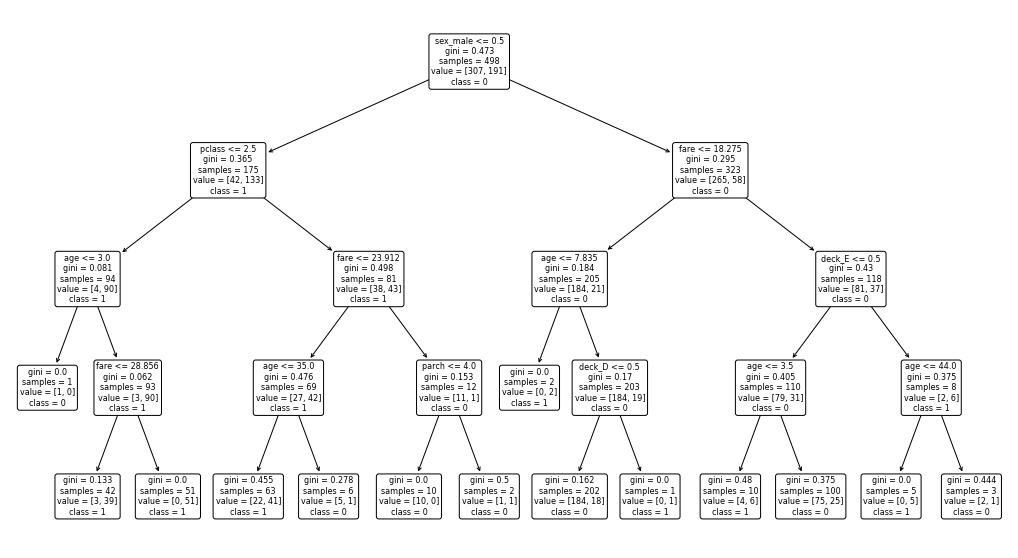

In [30]:
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)


In [39]:
#make predictions:
survived_prediction = pd.DataFrame(clf.predict(X_train))
survived_prediction.value_counts()

0    324
1    174
dtype: int64

In [40]:
# Predict probability
survival_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
survival_prediction_proba

,0,1
0,0.750000,0.250000
1,0.750000,0.250000
2,0.750000,0.250000
3,0.071429,0.928571
4,0.000000,1.000000
...,...,...
493,0.910891,0.089109
494,0.910891,0.089109
495,0.910891,0.089109
496,1.000000,0.000000


## 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [47]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on training set: "\
        f"{clf.score(X_train, Y_train)}")

Accuracy of Decision Tree classifer on training set: 0.8493975903614458


In [48]:
# confusion matrix
confusion_matrix(Y_train, survived_prediction)

array([[278,  29],
       [ 46, 145]])

In [49]:
Y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [51]:
labels = sorted(Y_train.unique())

pd.DataFrame(confusion_matrix(Y_train, survived_prediction), index=labels, columns=labels)

,0,1
0,278,29
1,46,145


In [52]:
#classification report
print(classification_report(Y_train, survived_prediction))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       307
           1       0.83      0.76      0.79       191

    accuracy                           0.85       498
   macro avg       0.85      0.83      0.84       498
weighted avg       0.85      0.85      0.85       498



## 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [46]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on training set: "\
        f"{clf.score(X_train, Y_train)}")

Accuracy of Decision Tree classifer on training set: 0.8493975903614458


In [53]:
# true positive rate is the same as recall
# Recall (True pos/ true pos + False neg) = 0.91 for deceased passengers, 
# 0.76 for survivors

# Precision (True pos/true pos + False pos) = 0.86 for deceased, 
# 0.83 for survivors

## 5. Run through steps 2-4 using a different max_depth value.

In [54]:
# now we fit the model to the training data
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

clf = clf.fit(X_train, Y_train)

[Text(447.271875, 498.3, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(196.17187500000003, 407.70000000000005, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(62.775000000000006, 317.1, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(31.387500000000003, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(94.16250000000001, 226.5, 'fare <= 28.856\ngini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(62.775000000000006, 135.89999999999998, 'fare <= 28.231\ngini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = 1'),
 Text(31.387500000000003, 45.299999999999955, 'gini = 0.093\nsamples = 41\nvalue = [2, 39]\nclass = 1'),
 Text(94.16250000000001, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(125.55000000000001, 135.89999999999998, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]\nclass = 1'),
 Text(329.56875, 317.1, 'fare <= 23.912\ngin

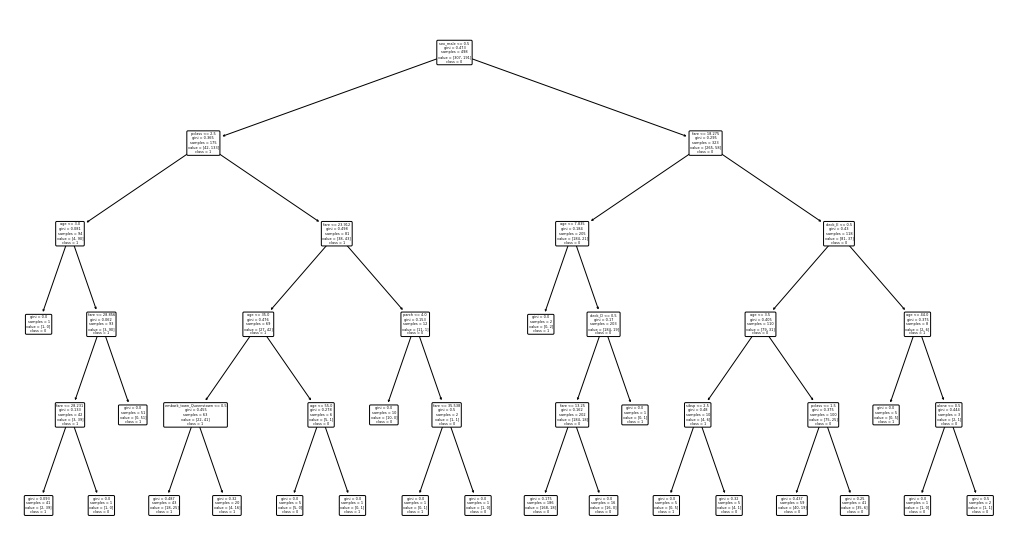

In [55]:
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [56]:
#make predictions:
survived_prediction = pd.DataFrame(clf.predict(X_train))
survived_prediction.value_counts()

0    328
1    170
dtype: int64

In [57]:
# Predict probability
survival_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
survival_prediction_proba

,0,1
0,0.677966,0.322034
1,0.853659,0.146341
2,0.853659,0.146341
3,0.048780,0.951220
4,0.000000,1.000000
...,...,...
493,0.903226,0.096774
494,0.903226,0.096774
495,0.903226,0.096774
496,1.000000,0.000000


In [58]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on training set: "\
        f"{clf.score(X_train, Y_train)}")

Accuracy of Decision Tree classifer on training set: 0.8614457831325302


In [59]:
# confusion matrix
confusion_matrix(Y_train, survived_prediction)

array([[283,  24],
       [ 45, 146]])

In [60]:
Y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [61]:
labels = sorted(Y_train.unique())

pd.DataFrame(confusion_matrix(Y_train, survived_prediction), index=labels, columns=labels)

,0,1
0,283,24
1,45,146


In [62]:
#classification report
print(classification_report(Y_train, survived_prediction))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       307
           1       0.86      0.76      0.81       191

    accuracy                           0.86       498
   macro avg       0.86      0.84      0.85       498
weighted avg       0.86      0.86      0.86       498



## 6. Which model performs better on your in-sample data?

### Scores in sample all improve with additional max_depth (5 vs 4).

## 7. Which model performs best on your out-of-sample data, the validate set?

## A. MAX DEPTH level 5

In [63]:
# MAX DEPTH: 5
# now we fit the model to the validate data
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

clf = clf.fit(X_validate, Y_validate)

[Text(467.5655172413793, 498.3, 'sex_male <= 0.5\ngini = 0.473\nsamples = 214\nvalue = [132, 82]\nclass = 0'),
 Text(233.78275862068966, 407.70000000000005, 'pclass <= 2.5\ngini = 0.419\nsamples = 77\nvalue = [23, 54]\nclass = 1'),
 Text(138.53793103448277, 317.1, 'age <= 55.0\ngini = 0.184\nsamples = 39\nvalue = [4, 35]\nclass = 1'),
 Text(103.90344827586208, 226.5, 'fare <= 28.5\ngini = 0.145\nsamples = 38\nvalue = [3, 35]\nclass = 1'),
 Text(69.26896551724138, 135.89999999999998, 'age <= 37.0\ngini = 0.337\nsamples = 14\nvalue = [3, 11]\nclass = 1'),
 Text(34.63448275862069, 45.299999999999955, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = 1'),
 Text(103.90344827586208, 45.299999999999955, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = 1'),
 Text(138.53793103448277, 135.89999999999998, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = 1'),
 Text(173.17241379310346, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(329.02758620689656, 317.1, 'embark_town

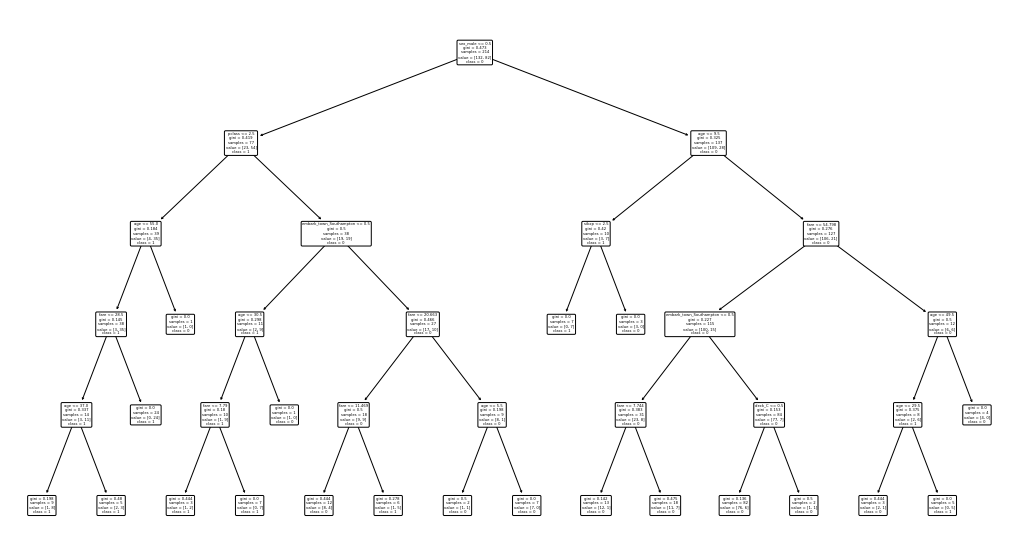

In [64]:
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_validate.columns, class_names=clf.classes_.astype(str), rounded=True)

In [65]:
#make predictions:
survived_prediction = pd.DataFrame(clf.predict(X_validate))
survived_prediction.value_counts()

0    148
1     66
dtype: int64

In [66]:
# Predict probability
survival_prediction_proba = pd.DataFrame(clf.predict_proba(X_validate))
survival_prediction_proba

,0,1
0,1.000000,0.000000
1,0.926829,0.073171
2,0.923077,0.076923
3,0.000000,1.000000
4,0.926829,0.073171
...,...,...
209,0.926829,0.073171
210,0.926829,0.073171
211,0.000000,1.000000
212,0.400000,0.600000


In [67]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on validation set: "\
        f"{clf.score(X_validate, Y_validate)}")

Accuracy of Decision Tree classifer on validation set: 0.8785046728971962


In [68]:
# confusion matrix
confusion_matrix(Y_validate, survived_prediction)

array([[127,   5],
       [ 21,  61]])

In [69]:
Y_validate.value_counts()

0    132
1     82
Name: survived, dtype: int64

In [70]:
labels = sorted(Y_validate.unique())

pd.DataFrame(confusion_matrix(Y_validate, survived_prediction), index=labels, columns=labels)

,0,1
0,127,5
1,21,61


In [71]:
#classification report
print(classification_report(Y_validate, survived_prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       132
           1       0.92      0.74      0.82        82

    accuracy                           0.88       214
   macro avg       0.89      0.85      0.87       214
weighted avg       0.88      0.88      0.88       214



## A. MAX DEPTH level 4

[Text(479.3727272727273, 489.24, 'sex_male <= 0.5\ngini = 0.473\nsamples = 214\nvalue = [132, 82]\nclass = 0'),
 Text(251.10000000000002, 380.52000000000004, 'pclass <= 2.5\ngini = 0.419\nsamples = 77\nvalue = [23, 54]\nclass = 1'),
 Text(136.96363636363637, 271.8, 'age <= 55.0\ngini = 0.184\nsamples = 39\nvalue = [4, 35]\nclass = 1'),
 Text(91.30909090909091, 163.08000000000004, 'fare <= 28.5\ngini = 0.145\nsamples = 38\nvalue = [3, 35]\nclass = 1'),
 Text(45.654545454545456, 54.360000000000014, 'gini = 0.337\nsamples = 14\nvalue = [3, 11]\nclass = 1'),
 Text(136.96363636363637, 54.360000000000014, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = 1'),
 Text(182.61818181818182, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(365.23636363636365, 271.8, 'embark_town_Southampton <= 0.5\ngini = 0.5\nsamples = 38\nvalue = [19, 19]\nclass = 0'),
 Text(273.92727272727274, 163.08000000000004, 'age <= 30.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = 

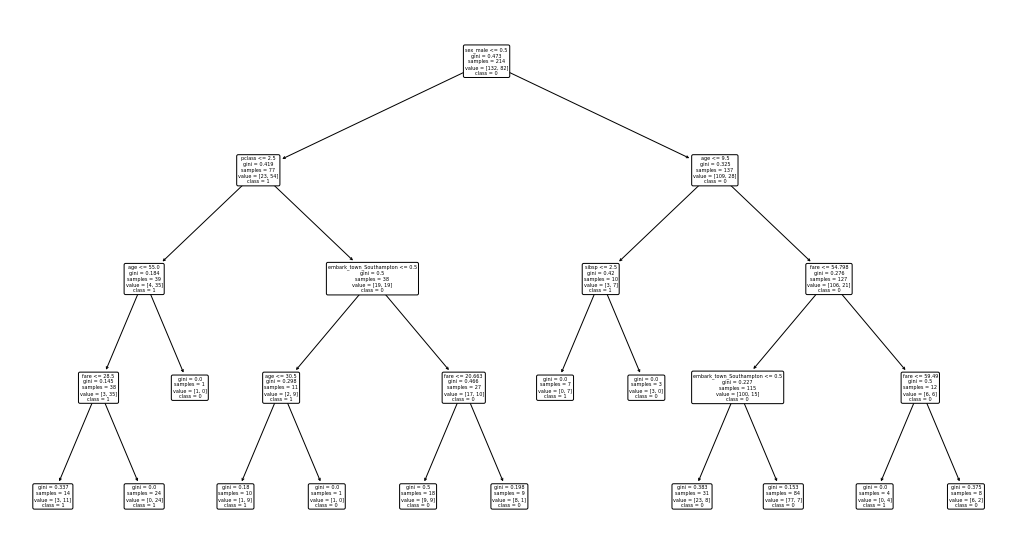

In [72]:
# MAX DEPTH: 4
# now we fit the model to the validate data
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

clf = clf.fit(X_validate, Y_validate)

plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X_validate.columns, class_names=clf.classes_.astype(str), rounded=True)

In [73]:
#make predictions:
survived_prediction = pd.DataFrame(clf.predict(X_validate))
survived_prediction.value_counts()

0    155
1     59
dtype: int64

In [74]:
# Predict probability
survival_prediction_proba = pd.DataFrame(clf.predict_proba(X_validate))
survival_prediction_proba

,0,1
0,0.888889,0.111111
1,0.916667,0.083333
2,0.741935,0.258065
3,0.000000,1.000000
4,0.916667,0.083333
...,...,...
209,0.916667,0.083333
210,0.916667,0.083333
211,0.750000,0.250000
212,0.214286,0.785714


In [75]:
# compute accuracy
print(f"Accuracy of Decision Tree classifer on validation set: "\
        f"{clf.score(X_validate, Y_validate)}")

Accuracy of Decision Tree classifer on validation set: 0.8551401869158879


In [76]:
# confusion matrix
confusion_matrix(Y_validate, survived_prediction)

Y_validate.value_counts()

labels = sorted(Y_validate.unique())

pd.DataFrame(confusion_matrix(Y_validate, survived_prediction), index=labels, columns=labels)

,0,1
0,128,4
1,27,55


In [77]:
#classification report
print(classification_report(Y_validate, survived_prediction))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       132
           1       0.93      0.67      0.78        82

    accuracy                           0.86       214
   macro avg       0.88      0.82      0.84       214
weighted avg       0.87      0.86      0.85       214



## Takeaway:

- 5 levels of depth is more accurate than 4 levels in this case:
    - 88% vs 85.5%